- Kode program 1 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli tanpa dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya, kalau ada error screenshot kirim ke wa saya)
- hasil training dengan data asli (classification non-tuning) dibandingkan dengan hasil training data asli menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Topik Riset 2:
"Real-Time DDoS Detection Using Transformer-Based Adaptive Attention Mechanism"
Deskripsi:
Topik ini meneliti penggunaan Transformer dengan Adaptive Attention Mechanism untuk mendeteksi serangan DDoS secara real-time. Alih-alih menggunakan mekanisme perhatian statis, adaptive attention memungkinkan model untuk secara dinamis menyesuaikan perhatian pada berbagai bagian urutan trafik berdasarkan tingkat ancaman yang terdeteksi. Hal ini dilakukan dengan memberikan bobot perhatian yang lebih besar pada segmen trafik yang menunjukkan pola anomali, seperti lonjakan tiba-tiba atau permintaan berlebihan dari banyak sumber. Model Transformer dilatih untuk mengenali perubahan dinamis dalam trafik yang tidak hanya didasarkan pada pola masa lalu tetapi juga respons sistem terhadap trafik yang sedang berjalan.
Novelty: Tinggi. Keunikan utama dari topik ini adalah penerapan adaptive attention, yang jarang diterapkan pada deteksi DDoS. Kebanyakan penelitian hanya menggunakan perhatian statis dalam Transformer, yang mungkin kurang efisien dalam mengidentifikasi pola trafik DDoS yang sangat dinamis dan cepat berubah. Dengan menggunakan perhatian adaptif, model dapat memberikan fokus lebih besar pada bagian trafik yang lebih penting atau lebih rentan terhadap serangan, sehingga meningkatkan efisiensi deteksi real-time dan mengurangi jumlah false positives. Ini juga membuka jalan untuk penerapan Transformer pada kasus-kasus yang membutuhkan respons sangat cepat dan tepat.




In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0))
print("PyTorch version:", torch.__version__)
print("PyTorch installation path:", torch.__file__)
print(torch.__file__)



CUDA available: True
CUDA device: Tesla T4
PyTorch version: 2.5.1+cu121
PyTorch installation path: /usr/local/lib/python3.10/dist-packages/torch/__init__.py
/usr/local/lib/python3.10/dist-packages/torch/__init__.py


In [ ]:
import torch
import torch.nn as nn

# Definisikan model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instansiasi model
model = SimpleModel()

# Tentukan perangkat (GPU jika tersedia, jika tidak maka CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pindahkan model ke perangkat yang sesuai
model.to(device)

print(f"Model dipindahkan ke perangkat: {device}")


# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

dataset sama dengan topik 5

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [ ]:
!pip install pydrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [ ]:
import os
os.chdir(r'/content/drive/MyDrive/KeamananSistemCerdas')
!ls


Binary_Class_Balanced_Dataset_4Lac_60_Features.csv  model_best_fold_2.pt  model_best_fold_4.pt
model_best_fold_1.pt				    model_best_fold_3.pt  model_best_fold_5.pt


Memuat dataset:

Dataset UNSW_NB15.csv dimuat ke dalam variabel data.

In [ ]:
data = pd.read_csv(r'Binary_Class_Balanced_Dataset_4Lac_60_Features.csv')



Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [ ]:
data.head(n=5)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,242,5,0,154,0,46,0,30.800000,18.780309,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,32329,1,3,0,0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,10466336,33,36,2750,4378,648,0,83.333333,160.270409,976,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
3,2846733,21,24,1458,2834,440,0,69.428571,127.041557,976,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
4,892,1,3,0,0,0,0,0.000000,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['Label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


Label
1    200000
0    200000
Name: count, dtype: int64
Jumlah kelas unik: 2


In [ ]:
data.shape


(400000, 61)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

In [ ]:
print(data.columns)


Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'Down/Up Ratio', '

In [ ]:
print(data['Label'].value_counts())


Label
1    200000
0    200000
Name: count, dtype: int64


Label
DDoS      1514
normal    1486
Name: count, dtype: int64
Jumlah kelas unik: 2


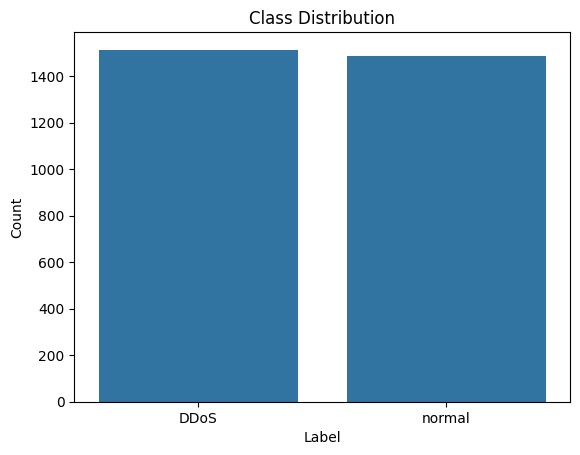

<ipython-input-11-8c81f299eed3>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'normal': 0, 'DDoS': 1})


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(r'Binary_Class_Balanced_Dataset_4Lac_60_Features.csv')

# Limit the data to a manageable size for analysis
data = data.sample(n=3000, random_state=42)  # Adjust the number as needed

# Replace 0 and 1 with 'normal' and 'DDoS'
data['Label'] = data['Label'].replace({0: 'normal', 1: 'DDoS'})

# Visualize the class distribution
kelas = data['Label'].value_counts()
print(kelas)

jumlah_kelas = data['Label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualize the class distribution
sns.countplot(x='Label', data=data)  # Adjust 'Label' if needed
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Convert back to numerical labels for modeling
data['Label'] = data['Label'].replace({'normal': 0, 'DDoS': 1})

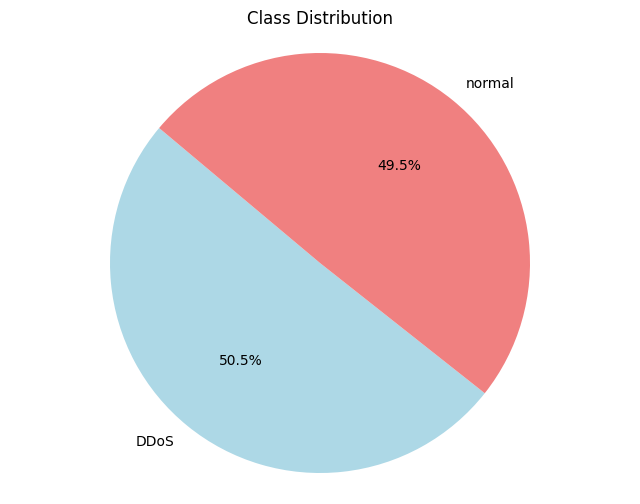

In [ ]:
# Visualize the class distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas, labels=kelas.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

# **DATA SPLITTING**

In [ ]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = data.drop('Label', axis=1)  # Fitur (semua kolom kecuali 'Label')
y = data['Label']                # Variabel target (kolom 'Label')

# Membagi data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y, test_size=0.2, random_state=50)

# Menampilkan informasi tentang ukuran set
print(f'Ukuran set pelatihan: {X_train_bin.shape[0]}')
print(f'Ukuran set pengujian: {X_test_bin.shape[0]}')


Ukuran set pelatihan: 2400
Ukuran set pengujian: 600


In [ ]:
# Verify the shapes of the resulting datasets
print(f"Training data shape: {X_train_bin.shape}")
print(f"Testing data shape: {X_test_bin.shape}")
print(f"Training labels shape: {y_train_bin.shape}")
print(f"Testing labels shape: {y_test_bin.shape}")


Training data shape: (2400, 60)
Testing data shape: (600, 60)
Training labels shape: (2400,)
Testing labels shape: (600,)


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [ ]:
!pip install transformers tensorflow scikit-learn matplotlib pandas
!pip install transformers torch scikit-learn


# **TRANSFORMER "DistilBERT"**

# **CLASSIFICATION Non-Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
# Misalkan data sudah dimuat di sini sebagai DataFrame bernama `data`
# data = pd.read_csv('path_to_your_data.csv')  # Ganti dengan path file yang sesuai

# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 2. Label Encoding
# Label encoding
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])
class_names = [str(class_name) for class_name in label_encoder.classes_]  # Konversi nama kelas ke string

data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 3. Define DistilBERT Model
from transformers import DistilBertModel, DistilBertTokenizer

class DistilBERTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(DistilBERTClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.fc = nn.Linear(self.distilbert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        return self.fc(outputs.last_hidden_state[:, 0, :])  # Menggunakan CLS token representation

# 4. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)  # 2-fold for testing
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []
average_val_accuracies = []

# Persiapkan tokenizer DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tambahkan variabel untuk melacak average_val_losses dan average_train_accuracies
average_val_losses = []  # Rata-rata loss validasi per epoch di setiap fold
average_train_accuracies = []  # Rata-rata akurasi pelatihan per epoch di setiap fold

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

   # Split data
    X_train, X_val = data.drop(columns=['Label', 'Label_encoded']).iloc[train_index], \
                     data.drop(columns=['Label', 'Label_encoded']).iloc[val_index]
    y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

    # Tokenisasi data
    X_train_text = X_train.astype(str).agg(' '.join, axis=1).tolist()
    X_val_text = X_val.astype(str).agg(' '.join, axis=1).tolist()

    train_encodings = tokenizer(X_train_text, truncation=True, padding=True, return_tensors='pt')
    val_encodings = tokenizer(X_val_text, truncation=True, padding=True, return_tensors='pt')

    y_train_tensor = torch.LongTensor(y_train.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    model = DistilBERTClassifier(num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 30
    # Inisialisasi variabel untuk menyimpan metrik per epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Inisialisasi untuk Early Stopping
    best_loss = float('inf')  # Loss terbaik diatur ke nilai yang sangat besar
    trigger_times = 0  # Hitungan untuk early stopping
    patience = 5  # Jumlah epoch tanpa peningkatan sebelum early stopping

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for inputs, attention_masks, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs, attention_masks)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        train_accuracy = correct / total  # Hitung akurasi pelatihan per epoch
        train_accuracies.append(train_accuracy)

        # Validasi
        model.eval()
        val_epoch_loss = 0
        with torch.no_grad():
            val_input_ids = val_encodings['input_ids']
            val_attention_mask = val_encodings['attention_mask']
            y_pred_probs = model(val_input_ids, val_attention_mask)
            val_loss = criterion(y_pred_probs, y_val_tensor)
            val_epoch_loss += val_loss.item()

            _, y_pred = torch.max(y_pred_probs, 1)
            y_pred_numpy = y_pred.cpu().numpy()  # Konversi ke NumPy
            y_val_numpy = y_val_tensor.cpu().numpy()  # Konversi ke NumPy

        avg_val_loss = val_epoch_loss / len(y_val_tensor)
        val_losses.append(avg_val_loss)

        accuracy = accuracy_score(y_val_numpy, y_pred_numpy)
        val_accuracies.append(accuracy)

        # Early stopping based on validation loss
        if avg_loss < best_loss:  # Monitor loss for early stopping
            best_loss = avg_loss
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Simpan hasil rata-rata untuk setiap fold
    average_train_losses.append(train_losses)
    average_val_losses.append(val_losses)  # Tambahkan validasi loss
    average_train_accuracies.append(train_accuracies)  # Tambahkan akurasi pelatihan
    average_val_accuracies.append(val_accuracies)

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val_numpy, y_pred_numpy)
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)
    f1 = f1_score(y_val_numpy, y_pred_numpy, average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(y_val_numpy, y_pred_numpy, target_names=class_names))

    # Store for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Plot Loss and Accuracy for Each Fold
# Plot Loss dan Accuracy untuk Setiap Fold
for fold in range(min(len(average_train_losses), len(average_val_losses))):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.plot(average_val_losses[fold], label='Validation Loss', marker='o')
    plt.title(f'Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(average_train_accuracies[fold], label='Training Accuracy', marker='o')
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Fold 1


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

# **Hyperparameter Tuning**

In [ ]:
!pip install optuna
!pip install sympy transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertModel, DistilBertTokenizer

# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load and preprocess data
# data = pd.read_csv('your_dataset.csv')  # Ganti dengan path dataset Anda
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])
class_names = label_encoder.classes_

# Cek dan isi nilai hilang
data.fillna(0, inplace=True)

# 2. Define DistilBERT Model
class DistilBERTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(DistilBERTClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.fc = nn.Linear(self.distilbert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        return self.fc(outputs.last_hidden_state[:, 0, :])  # Menggunakan output dari token [CLS]

# 3. Hyperparameter tuning setup
learning_rates = [1e-5, 2e-5, 5e-5]  # Learning rates to try
batch_sizes = [8, 16]  # Batch sizes to try
num_epochs_list = [2, 3]  # Epochs to try

best_model_params = {'lr': None, 'batch_size': None, 'num_epochs': None}
best_accuracy = 0

# 4. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)  # 5-fold for testing

for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_epochs in num_epochs_list:
            print(f'Testing with Learning Rate: {lr}, Batch Size: {batch_size}, Epochs: {num_epochs}')

            all_accuracy, all_f1_scores = [], []
            conf_matrix_list = []

            for fold, (train_index, val_index) in enumerate(kf.split(data)):
                print(f'Fold {fold + 1}')

                # Split data
                X_train, X_val = data.drop(columns=['Label', 'Label_encoded']).iloc[train_index], \
                                 data.drop(columns=['Label', 'Label_encoded']).iloc[val_index]
                y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

                # Pastikan semua kolom numerik
                X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
                X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

                # Gabungkan semua fitur numerik menjadi satu string untuk DistilBERT
                X_train_text = X_train.astype(str).agg(' '.join, axis=1).tolist()
                X_val_text = X_val.astype(str).agg(' '.join, axis=1).tolist()

                # Tokenisasi data
                tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
                train_encodings = tokenizer(X_train_text, truncation=True, padding=True, return_tensors='pt')
                val_encodings = tokenizer(X_val_text, truncation=True, padding=True, return_tensors='pt')

                # Convert to PyTorch tensors
                y_train_tensor = torch.LongTensor(y_train.values)
                y_val_tensor = torch.LongTensor(y_val.values)

                # Create DataLoader
                train_dataset = TensorDataset(train_encodings['input_ids'],
                                              train_encodings['attention_mask'],
                                              y_train_tensor)
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

                # Initialize model, loss, and optimizer
                model = DistilBERTClassifier(num_classes=len(class_names))
                criterion = nn.CrossEntropyLoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)

                # Train the model
                model.train()
                for epoch in range(num_epochs):
                    for inputs, attention_masks, labels in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs, attention_masks)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                # Validate the model
                model.eval()
                with torch.no_grad():
                    val_input_ids = val_encodings['input_ids']
                    val_attention_mask = val_encodings['attention_mask']
                    y_pred_probs = model(val_input_ids, val_attention_mask)
                    _, y_pred = torch.max(y_pred_probs, 1)

                accuracy = accuracy_score(y_val, y_pred.numpy())
                all_accuracy.append(accuracy)
                f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
                all_f1_scores.append(f1)

            # Calculate average metrics for this configuration
            average_accuracy = np.mean(all_accuracy)
            if average_accuracy > best_accuracy:
                best_accuracy = average_accuracy
                best_model_params['lr'] = lr
                best_model_params['batch_size'] = batch_size
                best_model_params['num_epochs'] = num_epochs

            print(f'Average Accuracy for LR={lr}, BS={batch_size}, Epochs={num_epochs}: {average_accuracy * 100:.2f}%')

# Output best parameters
print(f'Best Hyperparameters: Learning Rate = {best_model_params["lr"]}, Batch Size = {best_model_params["batch_size"]}, Epochs = {best_model_params["num_epochs"]}')

Testing with Learning Rate: 1e-05, Batch Size: 8, Epochs: 2
Fold 1


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Fold 2
Fold 3
Fold 4
Fold 5
Average Accuracy for LR=1e-05, BS=8, Epochs=2: 76.00%
Testing with Learning Rate: 1e-05, Batch Size: 8, Epochs: 3
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Average Accuracy for LR=1e-05, BS=8, Epochs=3: 82.00%
Testing with Learning Rate: 1e-05, Batch Size: 16, Epochs: 2
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Average Accuracy for LR=1e-05, BS=16, Epochs=2: 60.00%
Testing with Learning Rate: 1e-05, Batch Size: 16, Epochs: 3
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Average Accuracy for LR=1e-05, BS=16, Epochs=3: 90.00%
Testing with Learning Rate: 2e-05, Batch Size: 8, Epochs: 2
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Average Accuracy for LR=2e-05, BS=8, Epochs=2: 84.00%
Testing with Learning Rate: 2e-05, Batch Size: 8, Epochs: 3
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Average Accuracy for LR=2e-05, BS=8, Epochs=3: 94.00%
Testing with Learning Rate: 2e-05, Batch Size: 16, Epochs: 2
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Average Accuracy for LR=2e-05, BS=16, Epochs=2: 70.00%
Testing with Learn

# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

Fold 1
Early stopping triggered at epoch 8
Accuracy for fold 1: 30.00%
F1 Score for fold 1: 0.1385
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       0.00      0.00      0.00         7

    accuracy                           0.30        10
   macro avg       0.15      0.50      0.23        10
weighted avg       0.09      0.30      0.14        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


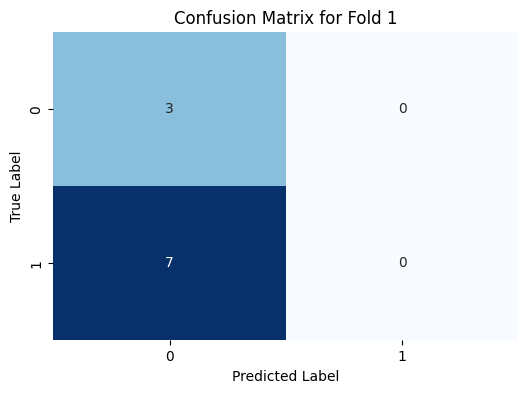

Fold 2
Early stopping triggered at epoch 10
Accuracy for fold 2: 60.00%
F1 Score for fold 2: 0.4500
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75         6

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


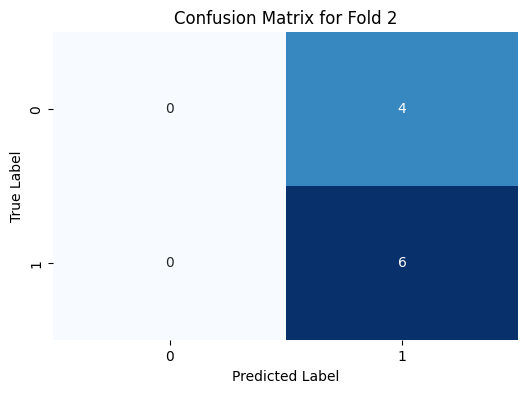

Fold 3
Early stopping triggered at epoch 9
Accuracy for fold 3: 60.00%
F1 Score for fold 3: 0.4500
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


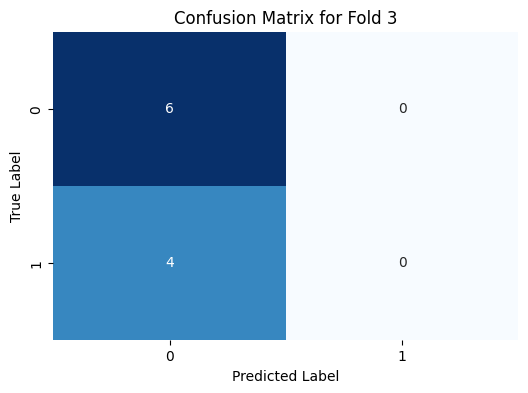

Fold 4
Early stopping triggered at epoch 10
Accuracy for fold 4: 30.00%
F1 Score for fold 4: 0.1385
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.30      1.00      0.46         3

    accuracy                           0.30        10
   macro avg       0.15      0.50      0.23        10
weighted avg       0.09      0.30      0.14        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


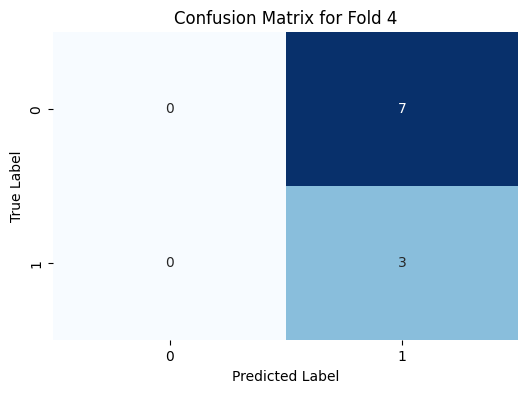

Fold 5
Early stopping triggered at epoch 18
Accuracy for fold 5: 60.00%
F1 Score for fold 5: 0.4500
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75         6

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


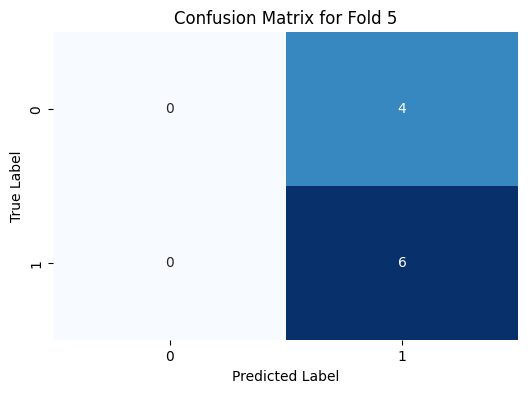

Average Accuracy: 48.00%
Average F1 Score: 0.3254


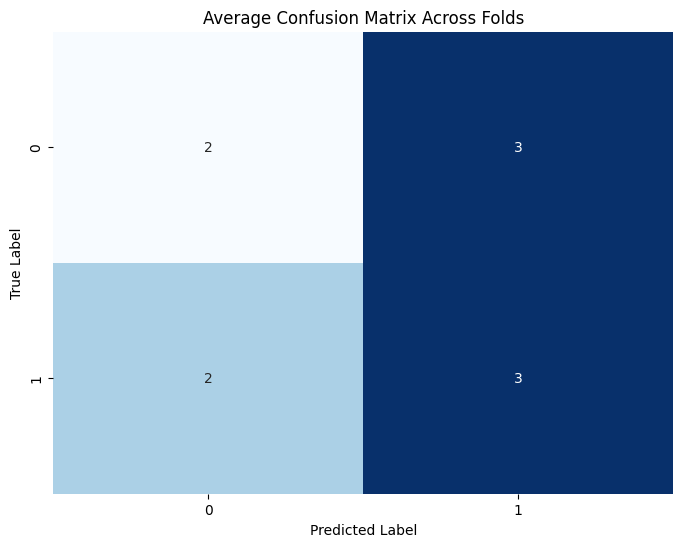

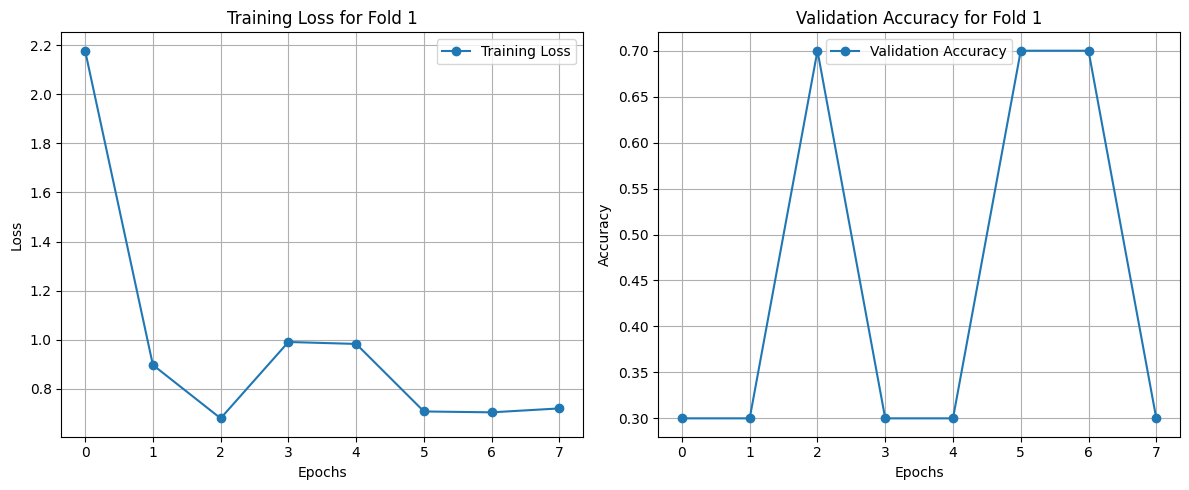

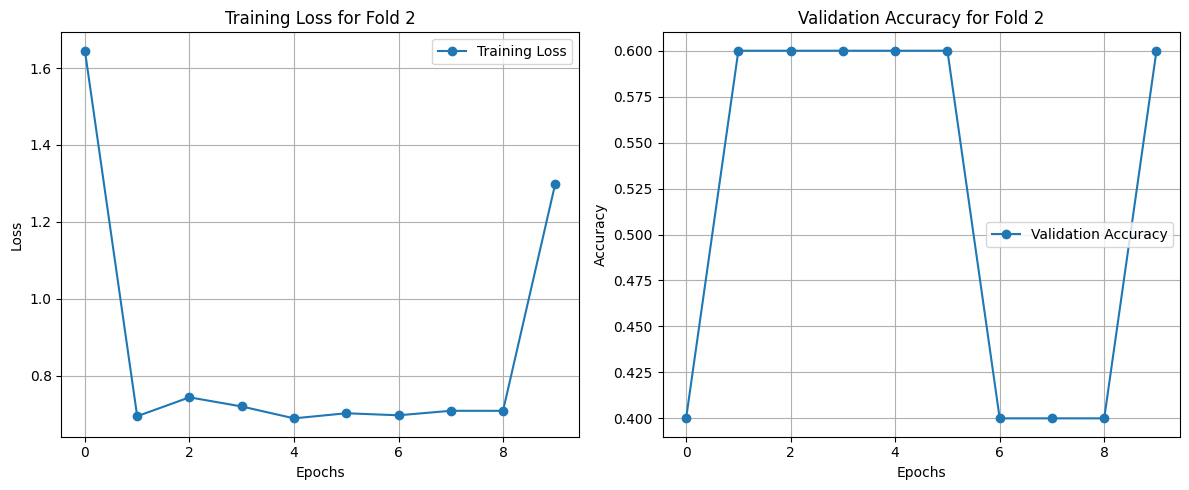

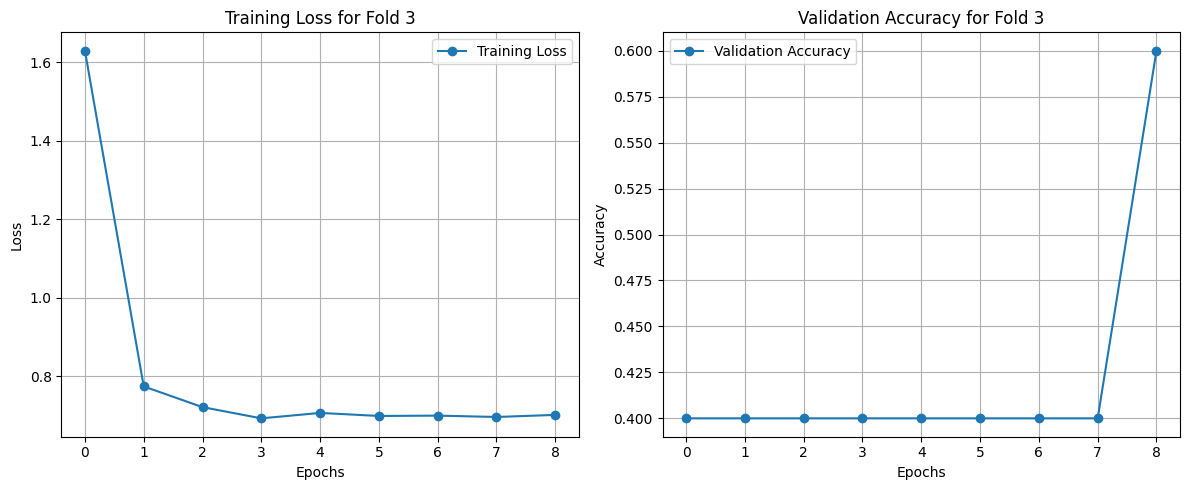

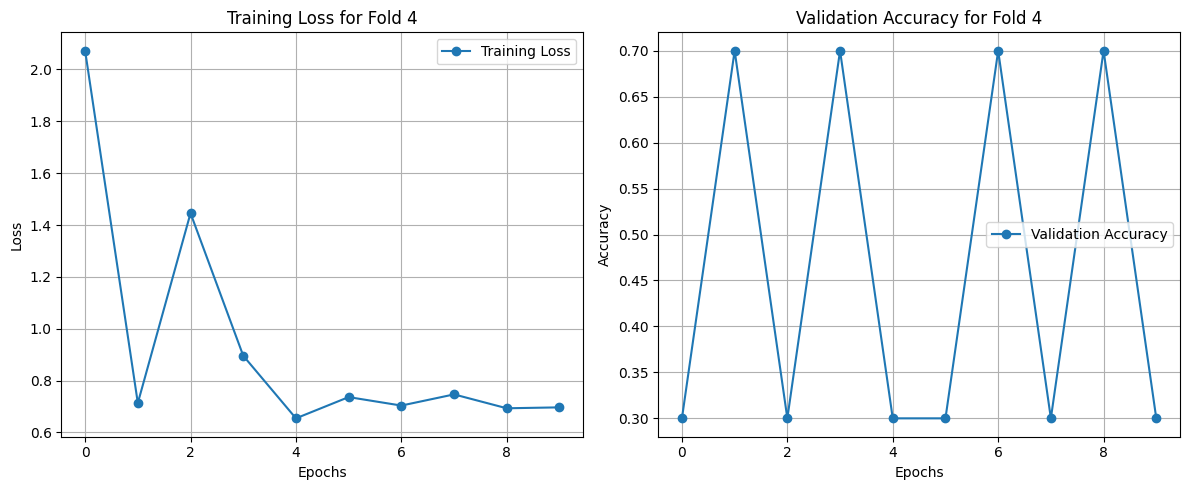

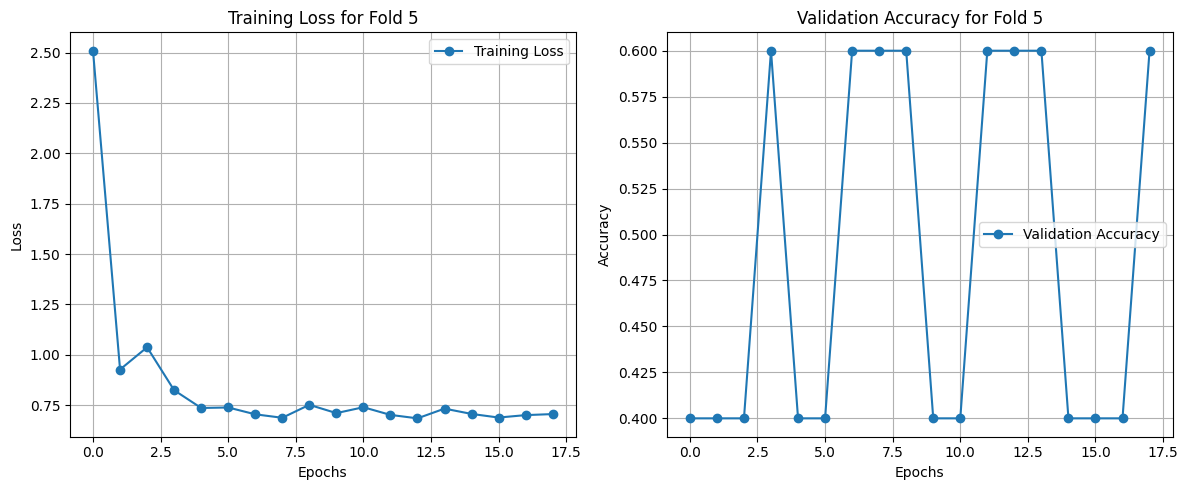

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
# Misalkan data sudah dimuat di sini sebagai DataFrame bernama `data`
# data = pd.read_csv('path_to_your_data.csv')  # Ganti dengan path file yang sesuai

# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 2. Label Encoding
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])
class_names = label_encoder.classes_  # Mendapatkan nama-nama kelas

# Cek dan isi nilai hilang
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 3. Define BERT Model
from transformers import BertModel, BertTokenizer

# 3. Define DistilBERT Model
class DistilBERTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(DistilBERTClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.fc = nn.Linear(self.distilbert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        return self.fc(outputs.last_hidden_state[:, 0, :])  # Menggunakan output dari token [CLS]

# 4. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)  # 5-fold for testing
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []
average_val_accuracies = []

# Persiapkan tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = data.drop(columns=['Label', 'Label_encoded']).iloc[train_index], \
                     data.drop(columns=['Label', 'Label_encoded']).iloc[val_index]
    y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

    # Pastikan semua kolom numerik
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Gabungkan semua fitur numerik menjadi satu string untuk BERT
    X_train_text = X_train.astype(str).agg(' '.join, axis=1).tolist()
    X_val_text = X_val.astype(str).agg(' '.join, axis=1).tolist()

    # Tokenisasi data
    train_encodings = tokenizer(X_train_text, truncation=True, padding=True, return_tensors='pt')
    val_encodings = tokenizer(X_val_text, truncation=True, padding=True, return_tensors='pt')

    # Convert to PyTorch tensors
    y_train_tensor = torch.LongTensor(y_train.values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize model, loss, and optimizer
    model = DistilBERTClassifier(num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    best_loss = float('inf')  # Initialize best_loss for early stopping
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 30  # Set to a higher number for better training
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, attention_masks, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs, attention_masks)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_input_ids = val_encodings['input_ids']
            val_attention_mask = val_encodings['attention_mask']
            y_pred_probs = model(val_input_ids, val_attention_mask)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Early stopping based on validation loss
        if avg_loss < best_loss:  # Monitor loss for early stopping
            best_loss = avg_loss
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Ubah ke tipe string untuk memastikan kompatibilitas
    target_names = [str(cls) for cls in label_encoder.classes_]

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(y_val_tensor.cpu().numpy(), y_pred.cpu().numpy(), target_names=target_names))

    # Store for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
